# Initialize dataset

In [495]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import math
from scipy.interpolate import interp1d 

In [496]:
sns.set(rc={'figure.figsize':(12.0, 5.0)})
sns.set_context("paper")
sns.set(style="ticks")

def rename_columns(df:pd.DataFrame, current, new_names):
    columns = dict(zip(current, new_names))
    df.rename(columns=columns, inplace=True)
    
CONST_AMPERAGE = "Chwilowe natężenie prądu [uA]"
CONST_TIMESTAMP = "Podstawa czasu [ms]"
CONST_CATEGORY = "Kategoria"

ble_hrt_connected = pd.read_csv("ble_hrt_connected.csv", delimiter=';')
ble_hrt_discovery = pd.read_csv("ble_hrt_discovery.csv", delimiter=';')  
ble_hrt_long_discovery = pd.read_csv("ble_hrt_long_discovery.csv", delimiter=';')
ble_mesh_ping_1300 = pd.read_csv("ble_mesh_ping_1300.csv", delimiter=';')
ble_mesh_standby = pd.read_csv("ble_mesh_standby.csv", delimiter=';')

rename_columns(ble_hrt_connected, ("ms", "uA"), (CONST_TIMESTAMP, CONST_AMPERAGE))
rename_columns(ble_hrt_discovery, ("ms", "uA"), (CONST_TIMESTAMP, CONST_AMPERAGE))
rename_columns(ble_hrt_long_discovery, ("ms", "uA"), (CONST_TIMESTAMP, CONST_AMPERAGE))
rename_columns(ble_mesh_ping_1300, ("ms", "uA"), (CONST_TIMESTAMP, CONST_AMPERAGE))
rename_columns(ble_mesh_standby, ("ms", "uA"), (CONST_TIMESTAMP, CONST_AMPERAGE))

ble_hrt_connected[CONST_CATEGORY] = "HRT Połączone"
ble_hrt_discovery[CONST_CATEGORY] = "HRT Discovery"
ble_hrt_long_discovery[CONST_CATEGORY] = "HRT Long Discovery"
ble_mesh_ping_1300[CONST_CATEGORY] = "Mesh: interwał zapytań=1300ms"
ble_mesh_standby[CONST_CATEGORY] = "Mesh: w gotowości"

data_hrt = pd.concat([ble_hrt_connected, ble_hrt_discovery, ble_hrt_long_discovery])
data_mesh = pd.concat([ble_mesh_ping_1300, ble_mesh_standby])

size=3675


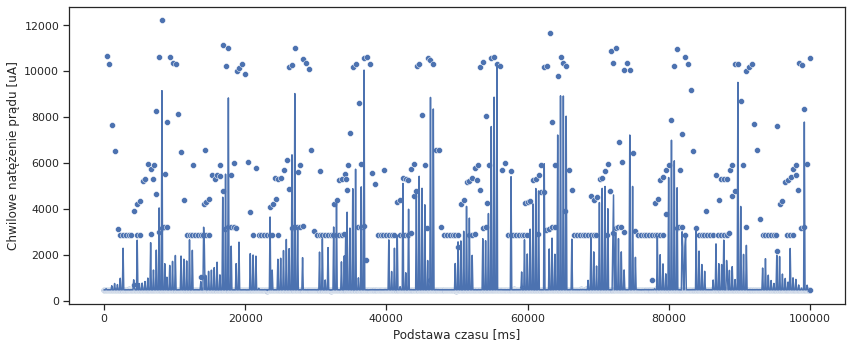

In [497]:
# sns.pointplot(data=ble_hrt_connected, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, linestyles="none")
print(f"size={len(ble_hrt_connected)}")

x = ble_hrt_connected[CONST_TIMESTAMP]
y =  ble_hrt_connected[CONST_AMPERAGE]
x_interp = np.linspace(x.min(), x.max(), 1000)
methods = ['linear', 'nearest', 'nearest-up', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next']
fig, ax = plt.subplots()
y_interp = interp1d(x, y, kind = "linear")(x_interp)
sns.lineplot(x=x_interp, y=y_interp, ax = ax)
sns.scatterplot(x=x, y=y, ax = ax)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Podstawa czasu [ms]', ylabel='Chwilowe natężenie prądu [uA]'>

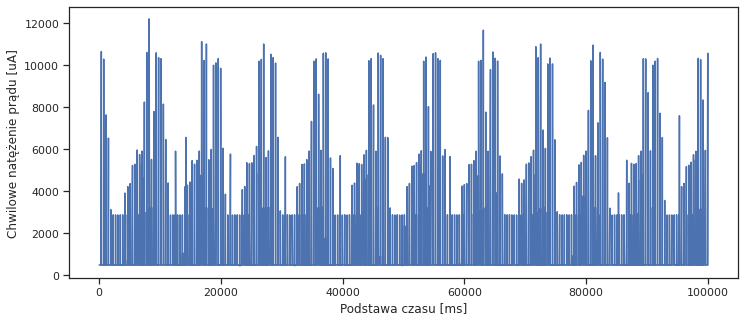

In [498]:
sns.lineplot(data=ble_hrt_connected, x=CONST_TIMESTAMP, y=CONST_AMPERAGE)

<AxesSubplot:xlabel='Podstawa czasu [ms]', ylabel='Chwilowe natężenie prądu [uA]'>

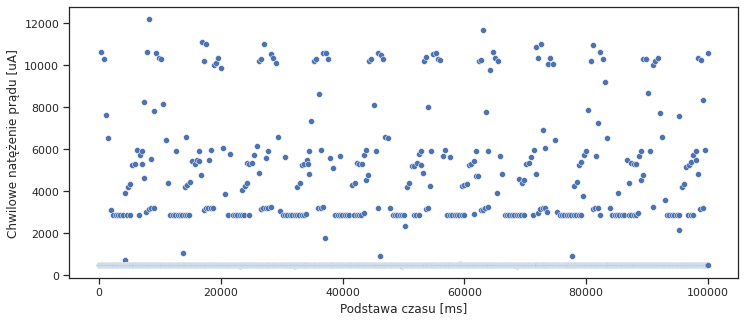

In [499]:
sns.scatterplot(data=ble_hrt_connected, x=CONST_TIMESTAMP, y=CONST_AMPERAGE)

cnt=201


<AxesSubplot:xlabel='Podstawa czasu [ms]', ylabel='Chwilowe natężenie prądu [uA]'>

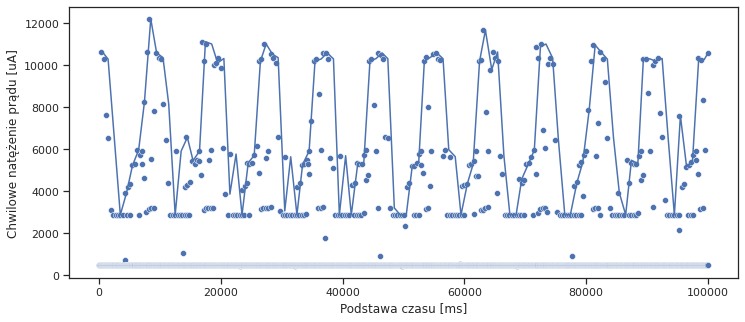

In [500]:
downsampled = ble_hrt_connected.groupby(ble_hrt_connected[CONST_TIMESTAMP].apply(lambda x: 1000*round(x/1000))).max()
# y = interp1d(downsampled[CONST_TIMESTAMP], downsampled[CONST_AMPERAGE], kind="linear")(downsampled[CONST_TIMESTAMP])
print(f"cnt={len(values)}")
sns.scatterplot(data=ble_hrt_connected,x=CONST_TIMESTAMP, y=CONST_AMPERAGE)
sns.lineplot(data=downsampled, x=CONST_TIMESTAMP, y=CONST_AMPERAGE)

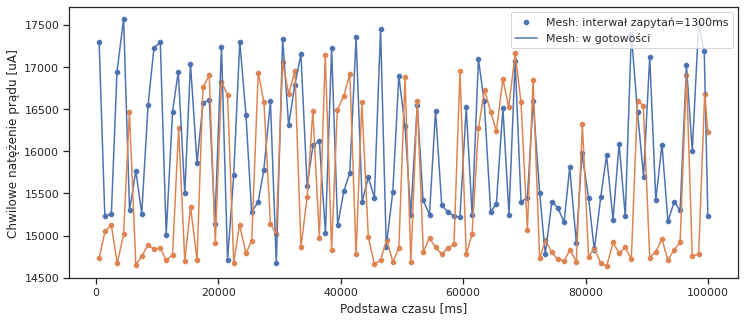

In [501]:
# sns.relplot(x=CONST_TIMESTAMP, y=CONST_AMPERAGE, data=data_mesh, hue=CONST_CATEGORY, col=CONST_CATEGORY, kind="line")

def plot(data):
    sampling = 1000
    categories = pd.unique(data[CONST_CATEGORY])
    values = pd.DataFrame()
    fig, ax = plt.subplots()
    for category in categories:
        data_category = data[data[CONST_CATEGORY] == category]
        downsampled = data_category.groupby(data_category[CONST_TIMESTAMP].apply(lambda x: sampling*round(x/sampling))).max()
        values = pd.concat([values, downsampled])
        s = sns.scatterplot(data=downsampled,x=CONST_TIMESTAMP, y=CONST_AMPERAGE, legend=False)
        l = sns.lineplot(data=downsampled, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, legend=False)
    
    plt.legend(labels=categories, loc="upper right")
    # ax.legend("upper right", bbox_to_anchor=(1, 1))
    plt.show(g)
    
    # g = sns.catplot(data=values,x=CONST_TIMESTAMP, y=CONST_AMPERAGE, kind="point", estimator=np.median, ci=None)
    # for ind, label in enumerate(g.ax.get_xticklabels()):
    #     if ind % sampling == 0:  # every 10th label is kept
    #         label.set_visible(True)
    #         label.set_rotation(90)
    #     else:
    #         label.set_visible(False)

# plot(data_mesh[data_mesh[CONST_CATEGORY] == "Mesh: interwał zapytań=1300ms"])
plot(data_mesh)

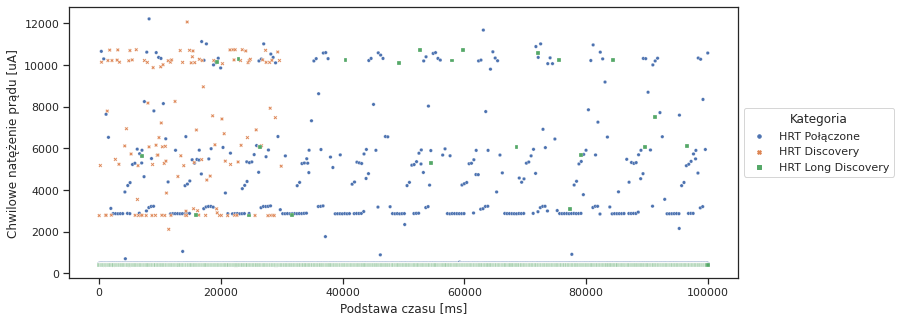

In [502]:
# g = sns.lineplot(data=data_mesh[data_mesh[CONST_CATEGORY] == "Mesh: interwał zapytań=1300ms"], x=CONST_TIMESTAMP, y=CONST_AMPERAGE)
g = sns.scatterplot(data=data_hrt, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, style=CONST_CATEGORY, size=CONST_CATEGORY, sizes=[12, 14, 30])
sns.move_legend(g, "center left", bbox_to_anchor=(1, .5))

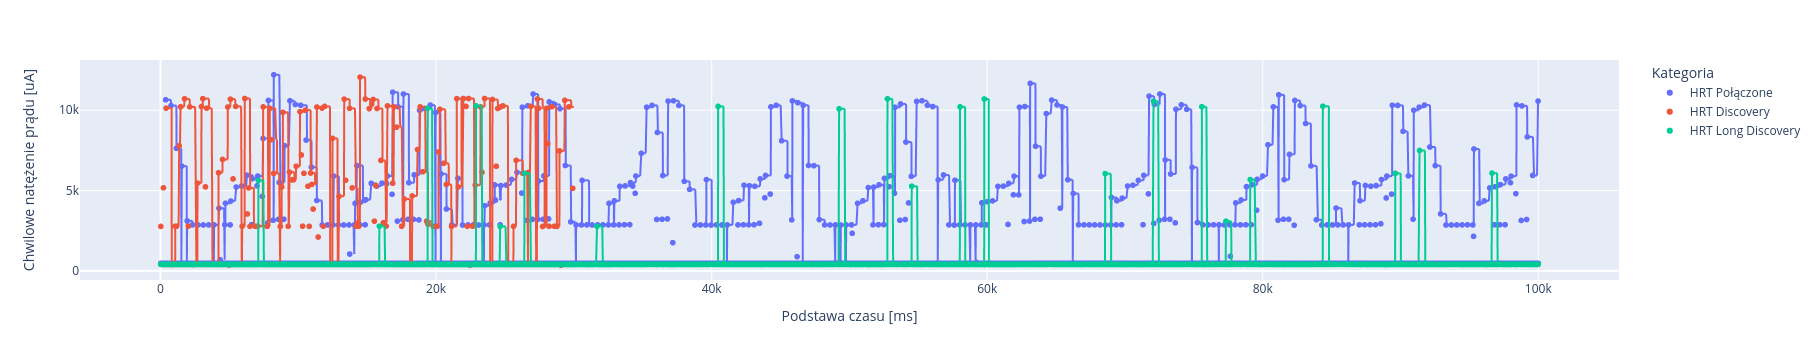

In [503]:
# sns.lineplot(data=data_mesh[data_mesh[CONST_CATEGORY] == "Mesh: w gotowości"], x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY)
# sns.lineplot(data=data_mesh, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY)
# fig = px.scatter(data_mesh, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, color=CONST_CATEGORY, trendline="lowess", trendline_options=dict(frac=0.005),
#                 title="Rolling Median")
# fig.data = [t for t in fig.data if t.mode == "lines"]
# fig.update_traces(showlegend=True) #trendlines have showlegend=False by default
fig = px.scatter(data_hrt, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, color=CONST_CATEGORY, trendline="rolling", trendline_options=dict(function="max", window=15))
                
# fig.data = [t for t in fig.data if t.mode == "lines"]
# fig.update_traces(showlegend=True) #trendlines have showlegend=False by default
fig.show()

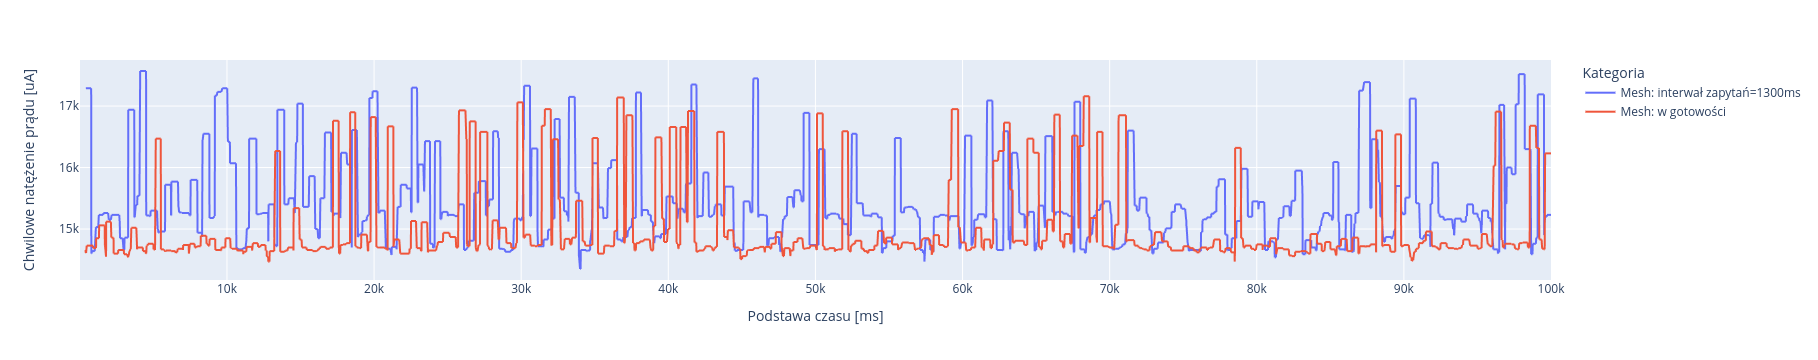

In [504]:
fig = px.scatter(data_mesh, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, color=CONST_CATEGORY, trendline="rolling", trendline_options=dict(function="max", window=15))
                
fig.data = [t for t in fig.data if t.mode == "lines"]
fig.update_traces(showlegend=True) #trendlines have showlegend=False by default
fig.show()

extrema_count=726
dot_sizes=[2, 2]


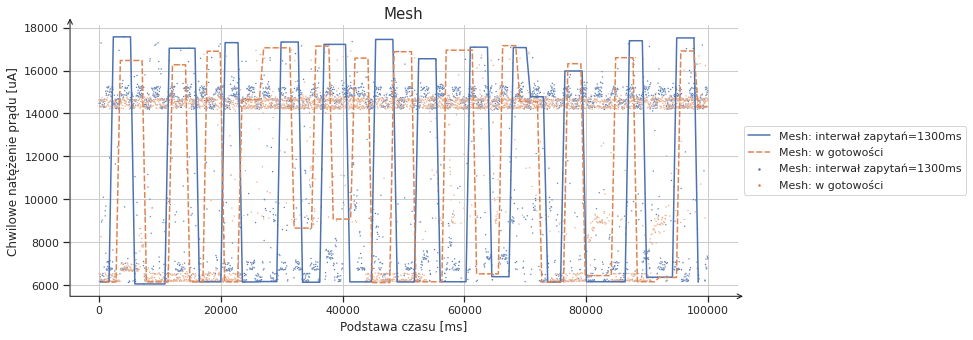

In [520]:
# from scipy.signal import find_peaks

y_values = data_mesh[CONST_AMPERAGE].to_numpy()
x_values = data_mesh[CONST_TIMESTAMP].to_numpy()

peaks, _ = find_peaks(y_values, distance=15)
mins, _ = find_peaks(y_values*-1, distance=15)
# x = np.linspace(0, 100, len(derivation))
# plt.plot(x_values, derivation, color='black');
# plt.plot(x_values[mins], derivation[mins], 'x', label='mins')
# plt.plot(x_values[peaks], derivation[peaks], '*', label='peaks')
# plt.plot(x_values[np.concatenate([mins,peaks])], derivation[np.concatenate([mins,peaks])], '*', label='p')
# plt.legend()
x_extrema = x_values[np.concatenate([mins,peaks])]
y_extrema = y_values[np.concatenate([mins,peaks])]
interp_count=len(x_extrema) // 10
print(f"extrema_count={len(x_extrema)}")

x_interp = np.linspace(x_extrema.min(), x_extrema.max(), interp_count)
# methods = ['linear', 'nearest', 'nearest-up', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next']
# fig, ax = plt.subplots()
y_interp = interp1d(x_extrema, y_extrema, kind = "zero")(x_interp)
# sns.lineplot(x=x_interp, y=y_interp)


def compute_extrema(data, window:int):
    x_extrema = []
    y_extrema = []
    categories = []
    for category in pd.unique(data[CONST_CATEGORY]):
        data_cat = data[data[CONST_CATEGORY] == category]
        y_values = data_cat[CONST_AMPERAGE].to_numpy()
        x_values = data_cat[CONST_TIMESTAMP].to_numpy()
        cat_values = data_cat[CONST_CATEGORY].to_numpy()
        
        peaks, _ = find_peaks(y_values, distance=window)
        mins, _ = find_peaks(y_values*-1, distance=window)
        x_extrema.append(x_values[np.concatenate([mins,peaks])])
        y_extrema.append(y_values[np.concatenate([mins,peaks])])
        categories.append(cat_values[np.concatenate([mins,peaks])])
    return pd.DataFrame({
        CONST_TIMESTAMP: np.concatenate(x_extrema), 
        CONST_AMPERAGE: np.concatenate(y_extrema), 
        CONST_CATEGORY: np.concatenate(categories)
    })

def compute_interpolation(data, multiplier:float):
    x = []
    y = []
    categories = []
    for category in pd.unique(data[CONST_CATEGORY]):
        data_cat = data[data[CONST_CATEGORY] == category]
        y_values = data_cat[CONST_AMPERAGE].to_numpy()
        x_values = data_cat[CONST_TIMESTAMP].to_numpy()
        cat_values = data_cat[CONST_CATEGORY].to_numpy()
        
        interp_count=int(len(x_values) * multiplier)
        x_interp = np.linspace(x_values.min(), x_values.max(), interp_count)
        # methods = ['linear', 'nearest', 'nearest-up', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next']
        y_interp = interp1d(x_values, y_values, kind = "nearest-up")(x_interp)
        
        x.append(np.array(x_interp))
        y.append(np.array(y_interp))
        categories.append(np.array([category for _ in range(len(x_interp))]))
        
    return pd.DataFrame({
        CONST_TIMESTAMP: np.concatenate(x), 
        CONST_AMPERAGE: np.concatenate(y), 
        CONST_CATEGORY: np.concatenate(categories)
    })

def plot_with_interpolation(data, title, window, interp_multiplier, dot_size):    
    p = compute_extrema(data, window)
    l = compute_interpolation(p, interp_multiplier)   
    dot_sizes = [dot_size for _ in range(len(pd.unique(data[CONST_CATEGORY])))]
    print(f"dot_sizes={dot_sizes}")
    fig, ax = plt.subplots()
    # g = sns.scatterplot(data=p, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, ax=ax)
    l = sns.lineplot(data=l, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, ax=ax, style=CONST_CATEGORY)
    gg = sns.scatterplot(data=data, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, ax=ax, style=CONST_CATEGORY, size=CONST_CATEGORY, sizes=dot_sizes)
    # g.legend(loc="center left", bbox_to_anchor=(1, .5))
    l.legend(loc="center left", bbox_to_anchor=(1, .5))
    gg.legend(loc="center left", bbox_to_anchor=(1, .5))
    
    ax.grid(True, axis='both')            
    # X Axis arrow
    ax.annotate('', xy=(1.01, 0.0), xytext=(-0.001, 0.0), xycoords="axes fraction",
        weight='bold', color="k", arrowprops=dict(arrowstyle='->', color="k"), annotation_clip=False)
    # Y Axis arrow
    ax.annotate('', xy=(0.002, 1.03), xytext=(0.002, -0.006), xycoords="axes fraction",
        weight='bold', color="k", arrowprops=dict(arrowstyle='->', color="k"), annotation_clip=False)
    plt.title(title, fontdict={"fontsize": 15})
    sns.despine(left=True, bottom=True, top=True, right=True)
    plt.show()
    
# p = compute_extrema(data_mesh, 200)
# l = compute_interpolation(p, 5)                          
# print(f"p={len(p)} l={len(l)}")
# sns.set(rc={'figure.figsize':(12.0, 5.0)})
# fig, ax = plt.subplots()
# # g = sns.scatterplot(data=p, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, ax=ax)
# l = sns.lineplot(data=l, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, ax=ax)
# gg = sns.scatterplot(data=data_mesh, x=CONST_TIMESTAMP, y=CONST_AMPERAGE, hue=CONST_CATEGORY, ax=ax, style=CONST_CATEGORY, size=CONST_CATEGORY, sizes=[2, 2])
# g.legend(loc="center left", bbox_to_anchor=(1, .5))
# l.legend(loc="center left", bbox_to_anchor=(1, .5))
# gg.legend(loc="center left", bbox_to_anchor=(1, .5))
# plt.show()

# default: figure.figsize: [6.0, 4.0]
#from matplotlib import rcParams
#print(rcParams)

plot_with_interpolation(data_mesh, "Mesh", 200, 5, 2)

dot_sizes=[8, 8, 8]


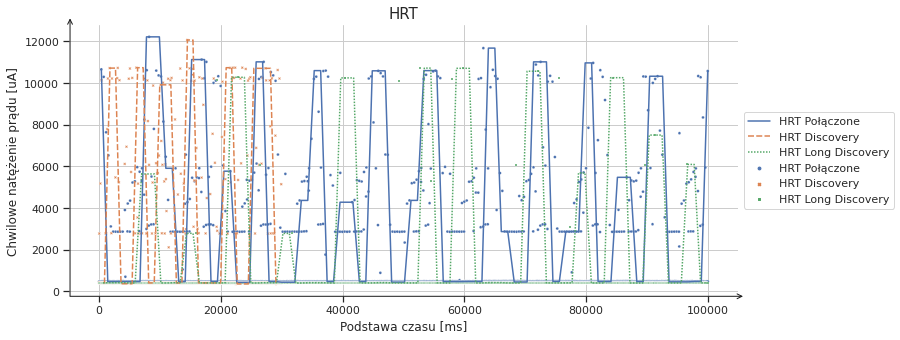

In [521]:
plot_with_interpolation(data_hrt, "HRT", 150, 2.5, 8)